# Machine Learning Task#3 | Digital Empowerment Pakistan | Customer Churn Prediction

## Importing Necessory Modules

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm,classification_report as cr
%matplotlib inline

## Reading Dataset 

In [3]:
df=pd.read_csv(".//csvfiles//churn.csv")

In [4]:
df.shape

(7043, 21)

In [5]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Data Exploration

In [6]:
df.drop(columns="customerID",inplace=True)

## Data Transformation and Cleaning

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df1=df[-(pd.to_numeric(df.TotalCharges,errors='coerce').isnull())]
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.dtypes

dtype('float64')

In [13]:
tenure_churn_no=df1[df1.Churn=="No"].tenure
tenure_churn_yes=df1[df1.Churn=="Yes"].tenure

## Plot histogram to analyze the churn ration according to tenure

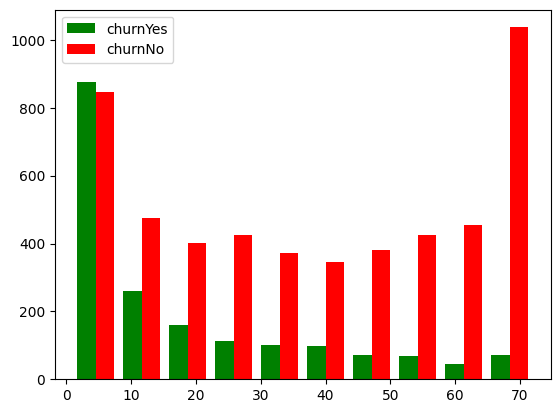

In [14]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churnYes','churnNo'])
plt.legend()

## Plot histogram to analyze the churn ration according to monthly charge

Text(0, 0.5, 'Count')

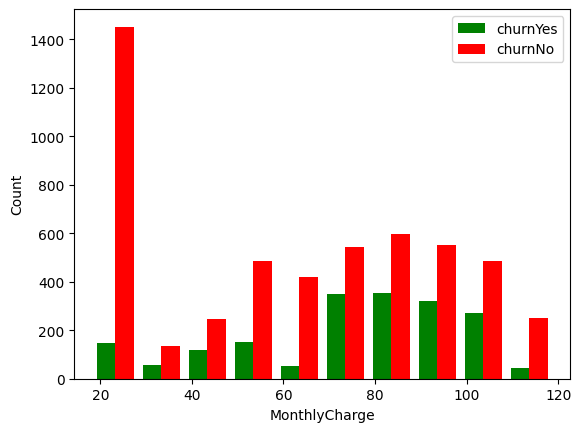

In [14]:
tenure_churn_no_mc=df1[df1.Churn=="No"].MonthlyCharges
tenure_churn_yes_mc=df1[df1.Churn=="Yes"].MonthlyCharges
plt.hist([tenure_churn_yes_mc,tenure_churn_no_mc],color=['green','red'],label=['churnYes','churnNo'])
plt.legend()
plt.xlabel("MonthlyCharge")
plt.ylabel("Count")



# handling text values in the dataset with various techniques

## Replacing Yes ,No values with 0 and 1 respectively

In [15]:
def print_unique_col_values(df1):
   for column in df1:
     if df1[column].dtype=='object':
         print(f"{column} : {df1[column].unique()}")
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
def remove_value_af_space(df,col):
  df[col]=df[col].apply(lambda x :x.split(' ')[0])
  return df


In [17]:
df2=remove_value_af_space(df1,'MultipleLines')



C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\2580102937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].apply(lambda x :x.split(' ')[0])


In [18]:
df3=remove_value_af_space(df2,'OnlineSecurity')
df4=remove_value_af_space(df3,'OnlineBackup')
df5=remove_value_af_space(df4,'DeviceProtection')
df6=remove_value_af_space(df5,'TechSupport')
df7=remove_value_af_space(df6,'StreamingTV')
df8=remove_value_af_space(df7,'StreamingMovies')

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\2580102937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].apply(lambda x :x.split(' ')[0])


In [19]:
print_unique_col_values(df8)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
yes_no_column=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
               "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in yes_no_column:
  df8[col].replace({"Yes":1,"No":0},inplace=True)


C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\1852970583.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df8[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\1852970583.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8[col].replace({

## Replacing female as 1 and male as 0 

In [23]:
print_unique_col_values(df8)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
df8['gender'].replace({"Female":1,"Male":0},inplace=True)

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\3999764685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['gender'].replace({"Female":1,"Male":0},inplace=True)


In [25]:
print_unique_col_values(df8)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


## Create dummy variable of text variables

In [26]:
df9=pd.get_dummies(data=df8,columns=["InternetService","Contract","PaymentMethod"])
df10=df9.replace({True : 1 , False : 0})

C:\Users\Arham khan\AppData\Local\Temp\ipykernel_6496\790303777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df10=df9.replace({True : 1 , False : 0})


In [27]:
df10.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df10.shape

(7032, 27)

# Data preprocessing , scaling values

In [32]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df10[col_to_scale]=scale.fit_transform(df10[col_to_scale])

In [33]:
df10.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1440,0,0,1,1,0.098592,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4382,1,1,0,0,0.042254,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1908,0,0,0,0,0.957746,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


# Our dataset is imbalance, there is a ratio of 1:3 between Churn and no Churn , this will create problem in our model building , to handle this I will use a technique called oversampling to balance the dataset

In [36]:
df10['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [40]:
df_0=df10[df10['Churn']==0]
df_1=df10[df10['Churn']==1]
churn_1_count=df_1.shape[0]
churn_0_count=df_0.shape[0]
df_0.shape,df_1.shape,churn_1_count,churn_0_count

((5163, 27), (1869, 27), 1869, 5163)

# Oversampling the dataset

In [46]:
df1_over=df_1.sample(churn_0_count,replace=True)
df1_over.shape,df_0.shape

((5163, 27), (5163, 27))

# Now our dataset is imbalance having ratio of churn 1:1

In [60]:
final_df=pd.concat([df1_over,df_0],axis=0)
final_df.shape

(10326, 27)

# Create X (independent variable) and Y (dependent variable) from dataset

In [61]:
x=final_df.drop(columns="Churn")
y=final_df[['Churn']]

# Splitting dataset into training and testing part

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8260, 26), (2066, 26), (8260, 1), (2066, 1))

# Model Building

In [66]:
model=RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)

C:\Users\Arham khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200)

# Got accuracy of 90 percent

In [67]:
accuracy=(model.score(x_test,y_test))*100

In [68]:
accuracy

90.36786060019361

In [70]:
predicted=model.predict(x_test)

# Classification Report , Got Precision , Recall and F1 score above 90 percent

In [71]:
print(cr(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1029
           1       0.86      0.96      0.91      1037

    accuracy                           0.90      2066
   macro avg       0.91      0.90      0.90      2066
weighted avg       0.91      0.90      0.90      2066



# Confusion Matrix to analyze the accuracy

In [76]:
confusion_matrix=cm(y_test,predicted)/10

Text(95.72222222222221, 0.5, 'Truth')

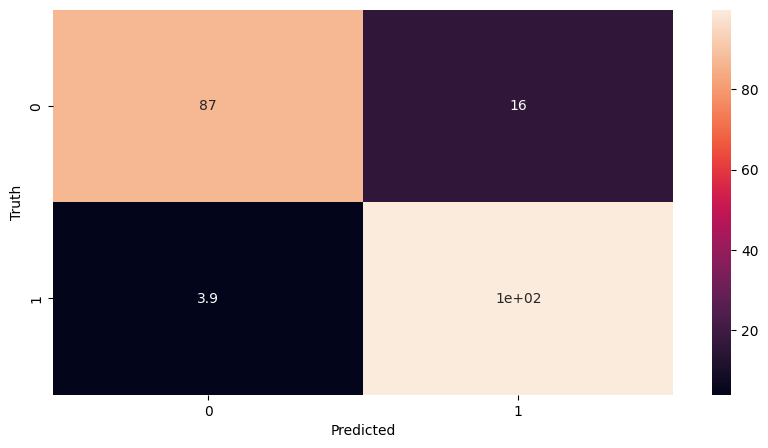

In [77]:
plt.figure(figsize=(10,5))
sb.heatmap(confusion_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Thank you